In [16]:
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt

In [8]:
n_samples=1500
X,y=datasets.make_moons(n_samples, noise=0.05)
X=StandardScaler().fit_transform(X)

In [9]:
single=cluster.AgglomerativeClustering(2,linkage='single')

In [10]:
kmeans=cluster.KMeans(2)

In [11]:
single.fit(X)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
y1_pred=single.labels_.astype(int)
y2_pred=kmeans.predict(X)

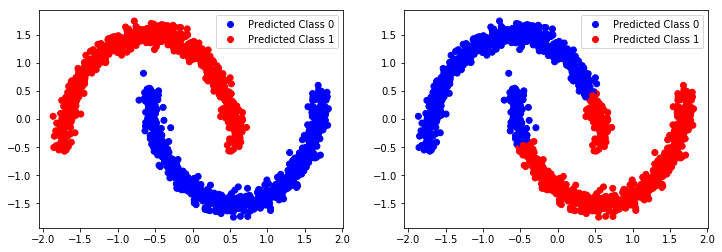

In [20]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
colors=np.array(['blue','red'])
ax[0].scatter(X[:,0],X[:,1],c=colors[y1_pred])
ax[1].scatter(X[:,0],X[:,1],c=colors[y2_pred])

legend_elems = [Line2D([0], [0], color=color, marker='o', linestyle='', label="Predicted Class {}".format(i))
                for i, color in enumerate(colors)]
ax[0].legend(handles=legend_elems, loc='upper right')
ax[1].legend(handles=legend_elems, loc='upper right')


In [22]:
print(silhouette_score(X,y1_pred))
print(silhouette_score(X,y2_pred))

0.39182068635117767
0.49852630434105016


In [24]:
from yellowbrick.cluster import KElbowVisualizer

In [27]:
import pandas as pd
X = pd.DataFrame(X)
X.head()

,0,1
0,-0.250403,1.354247
1,0.200671,-1.445037
2,0.891017,-1.387939
3,1.199309,-1.076132
4,1.678098,-0.009865


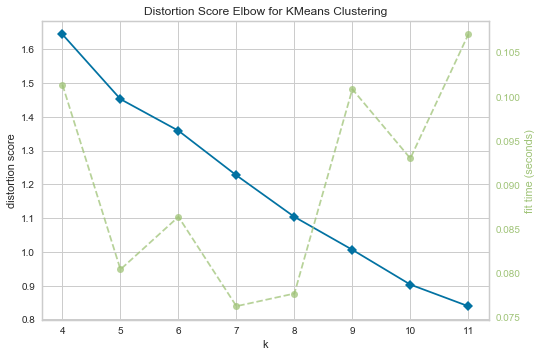

In [32]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X)
visualizer.poof()

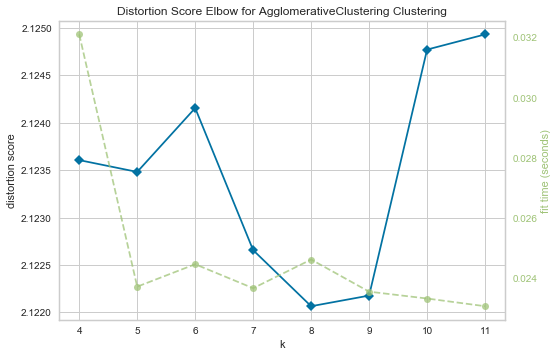

In [31]:

model = cluster.AgglomerativeClustering(2,linkage='single')
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X)
visualizer.poof()

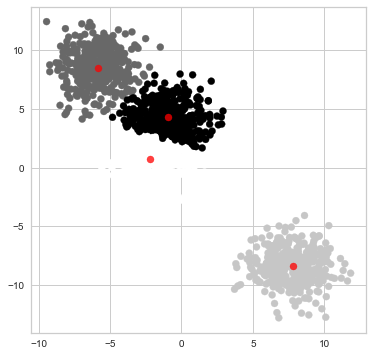

In [33]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, _ = make_blobs(n_samples=1500, centers=4, cluster_std=1.5)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75)
plt.show()

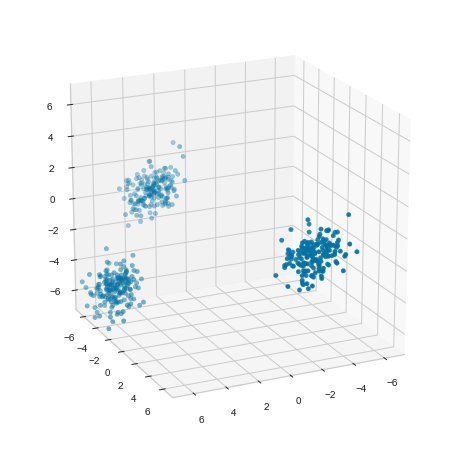

In [34]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R
X, _ = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.0)
X = np.c_[X, 0.5 * np.random.randn(X.shape[0], 1)]
rot = R.from_euler('y', 45, degrees=True)
X = rot.apply(X)
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.view_init(elev=20, azim=65)
plt.show()

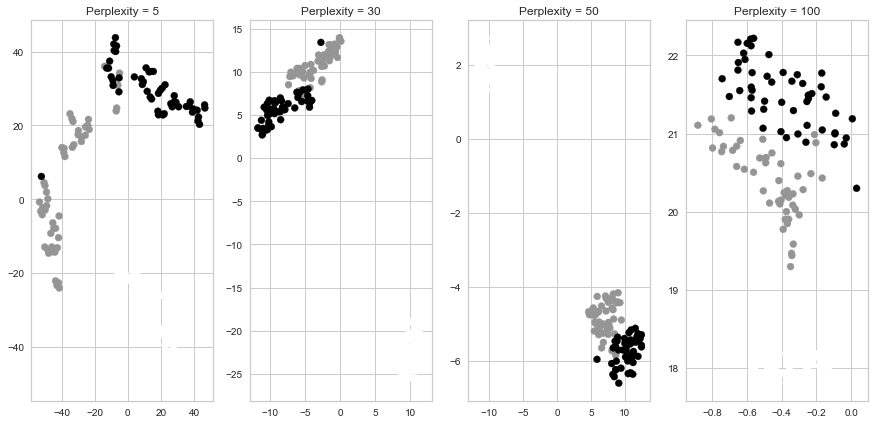

In [35]:
from sklearn.manifold import TSNE

X, y = datasets.load_iris(return_X_y=True)

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=y)
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()